In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import joblib
import os

In [3]:
features = pd.read_csv('/home/neji/python/music_recommender/data/processed/features.csv')
numeric_features = features.select_dtypes(include=[np.number])

# Standardize features
scaler = joblib.load("/home/neji/python/music_recommender/models/scaler.pkl")
X_scaled = scaler.transform(numeric_features)

print(f"Features shape: {X_scaled.shape}")

Features shape: (176514, 11)


In [7]:
model_path = f"/home/neji/python/music_recommender/models/kmeans_k2.pkl"
labels_path = f"/home/neji/python/music_recommender/models/cluster_labels_k2.npy"
kmeans = joblib.load(model_path)
labels = np.load(labels_path)

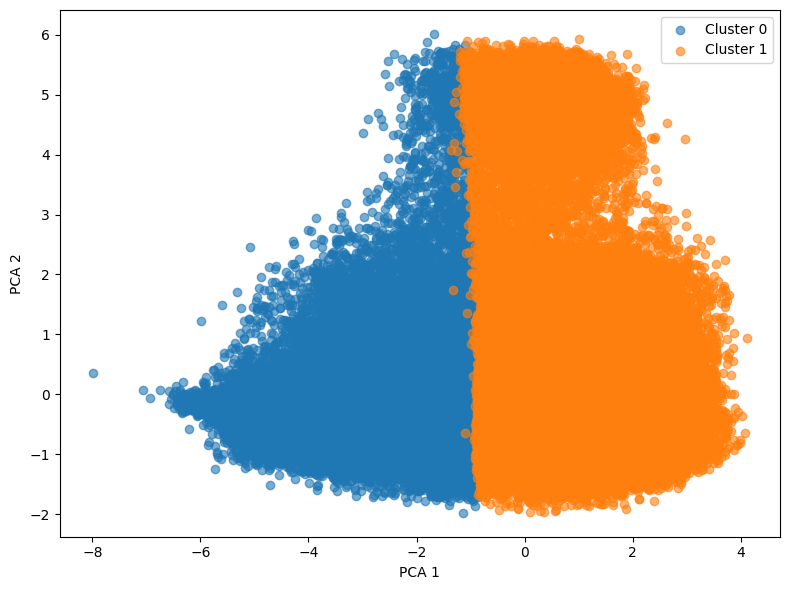

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
unique_clusters = np.unique(labels)
for cluster in unique_clusters:
    plt.scatter(
        X_pca[labels == cluster, 0],
        X_pca[labels == cluster, 1],
        label=f'Cluster {cluster}',
        alpha=0.6
    )
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.tight_layout()
plt.show()